# Artificial Intelligence - CA 3

In [1]:
# Installing needed libraries
!pip install hazm

In [21]:
!pip3 install parsivar

ERROR: hazm 0.7.0 has requirement nltk==3.3, but you'll have nltk 3.4.5 which is incompatible.



  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492963 sha256=f11b32cab5018878c762c4580fa8699448582d1c90e1a981ced12a55273ee3e3
  Stored in directory: c:\users\pr\appdata\local\pip\cache\wheels\54\0a\38\7d0b1aabbd644340a94fb8685fd20d9f35814d735973d07f40
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449911 sha256=dfca92b38f3135b793d8c8bacc5e5c0f533e4a73f987b8f0d5566010c7ad1739
  Stored in directory: c:\users\pr\appdata\local\pip\cache\wheels\23\18\48\8fd6ec11da38406b309470566d6f099c04805d2ec61d7829e7
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3


In [177]:
# Importing
import os
import pandas as pd
import hazm
from collections import Counter
import csv
import matplotlib.pyplot as plt
from hazm.utils import stopwords_list
import parsivar
from statistics import mean

### PART 1 - Preprocessing

The following steps were taken for preprocessing our data:

    1.Normalizing 
    2.Stemming
    3.Lemmatizing
    4.Removing stopwords
    5.Removing punctutations and useless characters
    

Stemming and Lemmatizing on average lowered the accuracy of our model. This is probably due to the fact that the normalizer functions were unsuccessful in stripping 'u\200c' from the passed strings. In the end, the only functions used were removing stop words and punctuations. 
The stop words used were a combination of imported stopwords (from Hazm) and the most common words in in the data.

***In order to preprocess our data we use Hazm library. 


##### Stemming

Stemming is a technique where a set of words in a sentence are converted into a sequence to shorten its lookup. The words which have the same meaning but have some variation according to the context or sentence are normalized.

##### Lemmatization

Lemmatization is the algorithmic process of finding the lemma (dictionary form) of a word depending on their meaning. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as the lemma.

In [3]:
# getting our data

train_df = pd.read_csv('train.csv')
train_text = open('train.csv', encoding='utf8').read()
test_df = pd.read_csv('test.csv')
test_text = open('test.csv', encoding='utf8').read()

In [207]:
def get_words(text):
    
    s = ''
    words = []
    
    for i in text:
        if i.isalpha():
            s += i.upper()
        elif s != '':
            words.append(s)
            s = ''
    if s != '':
        words.append(s)
            
    return words


normalizer = hazm.Normalizer()
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()
find_stems = parsivar.FindStems()

def stop_word_list(file_name, number):

    content = open(file_name, encoding='utf8').read()
    data = Counter(get_words(content))
    common_words = data.most_common(number)
    
    for i in range(number):
        common_words[i] = common_words[i][0]
        
    return common_words


def norm_stem_lem(string):
    
    string = normalizer.normalize(string)
    string = normalizer.affix_spacing(string)
    words = get_words(string)
    
    #for i in range(len(words)):
    #    stemmer.stem(words[i])
    #    words[i] = lemmatizer.lemmatize(words[i])
    #    words[i] = stemmer.stem(words[i])
        
    return words


def remove_stop_words(words, processed_stop_words, to_string=False):
    
    filtered_words = [word for word in words if word not in [''] + processed_stop_words]
    if to_string:
        return ' '.join(e for e in filtered_words)
    
    return filtered_words


def preprocess(file_name, number):
    
    stop_words_imported = stopwords_list() #stop_word_list(file_name, number)
    stop_words_text = stop_word_list(file_name, number)
    stop_words = stop_words_imported + stop_words_text + ['ی', 'یا', 'ای']
    
    csv_reader = csv.reader(open(file_name,'r', encoding='utf8'))
    #preprocessed_stop_words = norm_stem_lem(' '.join(w for w in stop_words))
    
    csv_text = []
    
    for row in csv_reader:
        
        label = norm_stem_lem(row[1])
        label = remove_stop_words(label, stop_words, to_string=True)
        content = norm_stem_lem(row[0])
        content = remove_stop_words(content, stop_words)
        csv_text.append([label, content])
            
    return csv_text

In [208]:
preprocessed_train_text = preprocess('train.csv', 13)[1:]
preprocessed_test_text = preprocess('test.csv', 13)[1:]

### PART 2 - Problem's Process


In this problem, we have the prior probability (that given a certain label, what is the possibility of having a word.) Now with using this information and two other terms we want to predict the label of the content with the words seen in it.

This is done with the help of bayas theorm, in which the likelihood (the probability of seeing a word given a label) is multiplied by prior (the probability of seeing a label) and divided by the evidence (the probability of seeing the word.)
The output of this is the posterior or the probability of having a certain label given that a certain word is presented in it.

To sum up we have:

    P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
    P(c) is the prior probability of class.
    P(x|c) is the likelihood which is the probability of predictor given class.
    P(x) is the prior probability of predictor.

where c is the label and x is the content seen and each term is calculated as follows:

    P(c|x): is calculated using the bayas theorm
    P(c): times a label is seen / the number of all labels
    P(x|c): times a word is seen given a label
    P(x): times a word is seen / the number of all the words available (counting the repeated ones as well.)
    
    
#### Bigrams


For instance in these two sentences: 'I have a broken watch' and 'There was a fight during the night watch' the word 'watch' has two totally different meanings which can be determined by using bigrams. In other words, by attaching 'broken' and 'night' to watch the meanings will become totally clear. 

In this example, using the bigrams suffices, but there are many examples in which only the use of three or more words alongside each other can clarify the meaning of the sentence. In order to cover these examples as well, we use N-grams in natural language processing.
    
    
#### Additive smoothing

    The problem: if a word is seen only in one category while training, the P(X|C) term of bayas theorm will be equal to 0. As a result, the output probability or P(C|X) will be 0 as well.

    Solution: Additive Smoothing
    
In statistics, additive smoothing, also called Laplace smoothing is a technique used to smooth categorical data. Given a set of observation counts ${\textstyle \textstyle {\mathbf {x} \ =\ \left\langle x_{1},\,x_{2},\,\ldots ,\,x_{d}\right\rangle }}$ from a ${\textstyle \textstyle {d}}$-dimensional multinomial distribution with ${\textstyle \textstyle {N}}$ trials, a "smoothed" version of the counts gives the estimator:

${\displaystyle {\hat {\theta }}_{i}={\frac {x_{i}+\alpha }{N+\alpha d}}\qquad (i=1,\ldots ,d)}$,

where the smoothed count ${\textstyle \textstyle {{\hat {x}}_{i}=N{\hat {\theta }}_{i}}}$ and the "pseudocount" α > 0 is a smoothing parameter. α = 0 corresponds to no smoothing.
Additive smoothing is a type of shrinkage estimator, as the resulting estimate will be between the empirical probability (relative frequency)  $ {\textstyle \textstyle {x_{i}/N}}$, and the uniform probability ${\textstyle \textstyle {1/d}}$. 


From a Bayesian point of view, this corresponds to the expected value of the posterior distribution, using a symmetric Dirichlet distribution with parameter α as a prior distribution. 


In order to implement this in our code, we replace P(X|C) with (P(X and C) + 1) / (N + k), where:

    K represents the dimensions(no of features) in the data,
    N represents the number of reviews with target_outcome=positive ==> N = P(C)


In [267]:
def get_labels(csv_text):
    
    labels = {}
    
    for i in range(len(csv_text)):
        if csv_text[i][0] not in labels:
            labels[csv_text[i][0]] = 0
            
    return labels


def get_labels_of_words(train_data, labels):
    
    word_dict = {}
    word_no = 0

    for i in range(len(train_data)):
        
        label, content = train_data[i]
        
        for word in content:
            word_no += 1
            if word not in word_dict:
                word_dict[word] = [0, 0, 0, 0]
                
            index = labels.index(label)
            word_dict[word][index] += 1
            
    return word_dict, word_no



def get_label_pr_for_word(train_data, word, words_no, word_dict, labels_dict, pr_label, pr_total_dict):
    
    if word not in word_dict:
    #    return pr_total_dict
        word_number = 0
    else:
        word_number = sum(word_dict[word])
        
    K = len(list(word_dict.keys()))

    for label in labels:
        
        #num_c_and_x = word_dict[word][list(labels.keys()).index(label)]
        #pr_c = pr_label[label]
        #num_x = word_number
        #num_c = pr_label[label] * words_no
        #K = len(list(word_dict.keys()))
        
        #pr_total_dict[label] += (num_c_and_x+1) / (num_c + K)  * pr_c
        
        if word not in word_dict:
            pr_total_dict[label] += 1 / (pr_label[label] * words_no + K) / words_no * pr_label[label]
        else:
            pr_total_dict[label] += (word_dict[word][list(labels.keys()).index(label)] + 1) / (pr_label[label] * words_no + K) * pr_label[label]
        
        # pr_total_dict[label] += word_dict[word][list(labels.keys()).index(label)] / pr_label[label] / word_number * pr_label[label]
        # pr_total_dict[label] += word_dict[word][list(labels.keys()).index(label)] * pr_label[label] / word_number
        
    return pr_total_dict


def get_labels_pr_total(train_data):
    
    labels = get_labels(train_data)
    
    for label, _ in train_data:
        labels[label] += 1
        
    total_sum = sum(labels.values())
    
    for label in labels:
        labels[label] /= total_sum
        
    return labels

In [268]:
def test_row(train_data, row, word_dict, words_no,  labels_dict, pr_label, pr_total_dict, check=False):
    
    the_label, content = row
    new_content = []
    i = 0
    [new_content.append(x) for x in content if x not in new_content]
    for word in new_content:        
        pr_total_dict = get_label_pr_for_word(train_data, word, words_no, word_dict, labels_dict, pr_label, pr_total_dict)
        #print(pr_total_dict)
        
    if check:
        return max(pr_total_dict, key=pr_total_dict.get) == the_label
        
    return max(pr_total_dict, key=pr_total_dict.get)


def test(train_data, test_data, words_no, word_labels_dict, labels, pr_label):
    
    probabilities_zero = {}
    for label in labels:
        probabilities_zero[label] = 0
    
    output = []
    for i in range(len(test_data)):
        if i % 10 == 0:
            print(i+1, '/', len(test_data))
        output.append(test_row(train_data, test_data[i], word_labels_dict, words_no, labels, pr_label, probabilities_zero))
    
    return output

In [269]:
data = preprocessed_train_text + preprocessed_test_text
labels = get_labels(data)
    
word_labels_dict, words_no = get_labels_of_words(preprocessed_train_text, list(labels.keys()))
pr_label = get_labels_pr_total(preprocessed_train_text)

In [270]:
output = test(preprocessed_train_text, preprocessed_test_text, words_no, word_labels_dict, labels, pr_label)

1 / 802
11 / 802
21 / 802
31 / 802
41 / 802
51 / 802
61 / 802
71 / 802
81 / 802
91 / 802
101 / 802
111 / 802
121 / 802
131 / 802
141 / 802
151 / 802
161 / 802
171 / 802
181 / 802
191 / 802
201 / 802
211 / 802
221 / 802
231 / 802
241 / 802
251 / 802
261 / 802
271 / 802
281 / 802
291 / 802
301 / 802
311 / 802
321 / 802
331 / 802
341 / 802
351 / 802
361 / 802
371 / 802
381 / 802
391 / 802
401 / 802
411 / 802
421 / 802
431 / 802
441 / 802
451 / 802
461 / 802
471 / 802
481 / 802
491 / 802
501 / 802
511 / 802
521 / 802
531 / 802
541 / 802
551 / 802
561 / 802
571 / 802
581 / 802
591 / 802
601 / 802
611 / 802
621 / 802
631 / 802
641 / 802
651 / 802
661 / 802
671 / 802
681 / 802
691 / 802
701 / 802
711 / 802
721 / 802
731 / 802
741 / 802
751 / 802
761 / 802
771 / 802
781 / 802
791 / 802
801 / 802


### PART 3 - Accuracy Test

##### The problem with only considering Precision and Recall 

Recall: Within everything that actually is positive, how many did the model succeed to find:

    A model with high recall succeeds well in finding all the positive cases in the data, even though they may also wrongly identify some negative cases as positive cases.
    A model with low recall is not able to find all (or a large part) of the positive cases in the data.
    
Precision: Within everything that has been predicted as a positive, precision counts the percentage that is correct:

    A not precise model may find a lot of the positives, but its selection method is noisy: it also wrongly detects many positives that aren’t actually positives.
    A precise model is very “pure”: maybe it does not find all the positives, but the ones that the model does class as positive are very likely to be correct.
    
    
A high recall by itself is not a good measure of how well our model works, because a high recall value only means the model tends to identify the positive values very well. This does not explain anything on model's performance with negative data and therefore, is an incomplete measurement. For example, a model can simply return positive for any given input. In this case since all positive values are correctly detected, the recall value is equal to 1, even though the model works poorly.

In the case for precision, the measurement is also incomplete. For instance, a model can only be capable of classifying simple inputs (e.g. the ones that were seen most while training) as positive value and miss a lot of positive samples due to inflexibility. In this case the precision is rather high which is not a good reflection on how the model is performing.


##### F1-Score

The F1 score is the "harmonic mean" of the precision and recall; Where the harmonic mean H of the positive real numbers ${\displaystyle x_{1},x_{2},\ldots ,x_{n}}$ is defined to be:

${\displaystyle H={\frac {n}{{\frac {1}{x_{1}}}+{\frac {1}{x_{2}}}+\cdots +{\frac {1}{x_{n}}}}}={\frac {n}{\sum \limits _{i=1}^{n}{\frac {1}{x_{i}}}}}=\left({\frac {\sum \limits _{i=1}^{n}x_{i}^{-1}}{n}}\right)^{-1}.}$

The harmonic mean emphasizes the lowest value, so if one of the parameters is small, the second one is no longer influential.

Using this formula allows us to have a metric that is not sensitive to extremely large values, but, on the other hand, not all outliers are ignored in it and extremely low values have a significant influence on the result. Such a function is a perfect choice for the scoring metric of a classifier because useless classifiers get a meager score. To sum up, the characteristic of the metric allows us to compare the performance of two classifiers using just one metric and still be sure that the classifiers are not making some horrible mistakes that are unnoticed by the code which scores their output.


##### Multi-Class Metrics

We used f1-score in classifiers to have a single metric repressenting the whole model. Now with multiple classes at hand, many f1-scores are generated and again the comparison of two non-binary classifiers is rather hard. Multiclass metrics are therefore used to create this single metric as a (relatively good) repressentative of the models.

The steps taken for calculating this metric are:

    -calculating precision and recall for each clas
    -calculating f1-score for each class
    -combining the f1-scores
    
The last step can be taken in many ways:

    1.Macro-F1: It is computed as a simple arithmetic mean of our per-class F1-scores
    2.Weighted-F1: In this, we weight the F1-score of each class by the number of samples from that class.
    3.micro-F1: We consider all the samples and (precision, recall, f1, and accuracy are equal in this method)
    
    
**NOTE: The f1-score is calculated with the precision and recall generated through the aforementioned approaches.


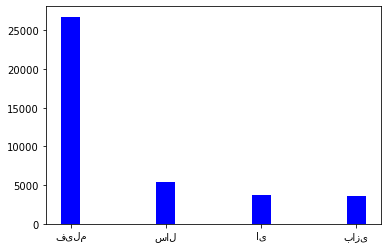

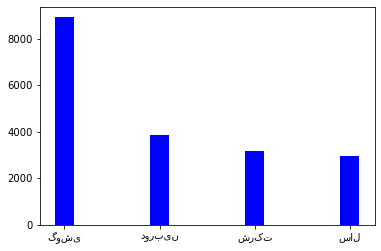

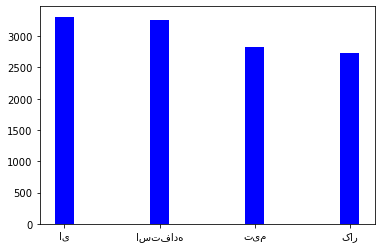

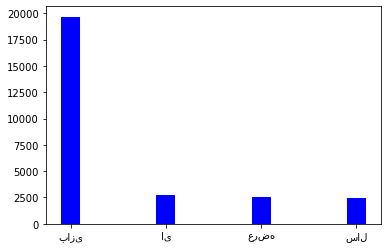

In [126]:
for i in range(4):
    
    d = dict(sorted(word_labels_dict.items(), key=lambda item: item[1][i], reverse=True)[0:4])
    x = list(d.keys())
    y = [d[label][i] for label in x]
    plt.bar(x, y, color ='blue', width = 0.2)
    plt.show()

In [230]:
output = o

labels = get_labels(preprocessed_train_text)
tp_dict = get_labels(preprocessed_train_text)
fp_dict = get_labels(preprocessed_train_text)
fn_dict = get_labels(preprocessed_train_text)
precision_dict = get_labels(preprocessed_train_text)
recall_dict = get_labels(preprocessed_train_text)
f1_dict = get_labels(preprocessed_train_text)

t = 0
f = 0
for i in range(len(preprocessed_test_text)):
    
    if preprocessed_test_text[i][0] == output[i]:
        t += 1
        tp_dict[output[i]] += 1
    else:
        f += 1
        fp_dict[output[i]] += 1
        fn_dict[preprocessed_test_text[i][0]] += 1    

In [231]:
for label in labels:
    
    if (tp_dict[label] + fp_dict[label]) != 0:
        precision_dict[label] = tp_dict[label] / (tp_dict[label] + fp_dict[label])
        
    if (fn_dict[label] + tp_dict[label]) != 0:
        recall_dict[label] = tp_dict[label] / (fn_dict[label] + tp_dict[label])
        
    if (recall_dict[label] + precision_dict[label]) != 0:
        f1_dict[label] = 2 * recall_dict[label] * precision_dict[label] / (recall_dict[label] + precision_dict[label])

#### Results with Smoothing

In [271]:
mean_precision = mean(precision_dict.values())
mean_recall = mean(recall_dict.values())
macro_f1 = 2 * mean_precision * mean_recall / (mean_precision + mean_recall)

wm_precision = 0
wm_recall = 0

for label in labels:
    wm_precision += pr_label[label] * precision_dict[label]
    wm_recall += pr_label[label] * recall_dict[label]

weighed_f1 = 2 * wm_recall * wm_precision / (wm_recall + wm_precision) 

accuracy = t / (t + f)


print('ACCURACY:', accuracy)
print('MACRO-F1:', macro_f1)
print('Weighed-F1:', weighed_f1)
print('MiCRO-F1:', accuracy)

ACCURACY: 0.22069825436408977
MACRO-F1: 0.23390774609268444
Weighed-F1: 0.23390774609268444
MiCRO-F1: 0.22069825436408977


In [272]:
pd.DataFrame(list(precision_dict.items()))

,0,1
0,هنر سینما,0.210458
1,علم تکنولوژی,0.483871
2,سلامت زیبایی,0.166667
3,بازی ویدیویی,0.000000


In [273]:
pd.DataFrame(list(recall_dict.items()))

,0,1
0,هنر سینما,0.964072
1,علم تکنولوژی,0.054152
2,سلامت زیبایی,0.006211
3,بازی ویدیویی,0.000000


In [274]:
pd.DataFrame(list(f1_dict.items()))

,0,1
0,هنر سینما,0.345494
1,علم تکنولوژی,0.097403
2,سلامت زیبایی,0.011976
3,بازی ویدیویی,0.000000


#### Results without smoothing 

In [232]:
mean_precision = mean(precision_dict.values())
mean_recall = mean(recall_dict.values())
macro_f1 = 2 * mean_precision * mean_recall / (mean_precision + mean_recall)

wm_precision = 0
wm_recall = 0

for label in labels:
    wm_precision += pr_label[label] * precision_dict[label]
    wm_recall += pr_label[label] * recall_dict[label]

weighed_f1 = 2 * wm_recall * wm_precision / (wm_recall + wm_precision) 

accuracy = t / (t + f)


print('ACCURACY:', accuracy)
print('MACRO-F1:', macro_f1)
print('Weighed-F1:', weighed_f1)
print('MiCRO-F1:', accuracy)

ACCURACY: 0.22069825436408977
MACRO-F1: 0.23390774609268444
Weighed-F1: 0.23390774609268444
MiCRO-F1: 0.22069825436408977


In [234]:
pd.DataFrame(list(precision_dict.items()))

,0,1
0,هنر سینما,0.210458
1,علم تکنولوژی,0.483871
2,سلامت زیبایی,0.166667
3,بازی ویدیویی,0.000000


In [235]:
pd.DataFrame(list(recall_dict.items()))

,0,1
0,هنر سینما,0.964072
1,علم تکنولوژی,0.054152
2,سلامت زیبایی,0.006211
3,بازی ویدیویی,0.000000


In [236]:
pd.DataFrame(list(f1_dict.items()))

,0,1
0,هنر سینما,0.345494
1,علم تکنولوژی,0.097403
2,سلامت زیبایی,0.011976
3,بازی ویدیویی,0.000000


####  Conclusion

Though many approaching on various levels have been tried, our model is incapable of predicting the labels and is performing poorly. This is most probably due to a mistake in calculating the bayas theorm's formula. Different preprocessing methods have been tested. Amongst them was using lemmatizing, stemming, fixing the spaces between words, normalzing the values, .... In the end, not using the lemmatizing and stemming parts proved a small improvement in the model. For filtering the stopwords, a combination of the stopwords imported from Hazm and the 13 most frequent words in the train data had the best results.

Unfortunately, even though the most frequent words of each label seem to be logically detected, the overall model does not operate as expected. Still, we see a slight improvement with the use of additive smoothing.